# Lezione 08

## Dario Pullia

### Esercizio 08.1

Spiegazioni varie

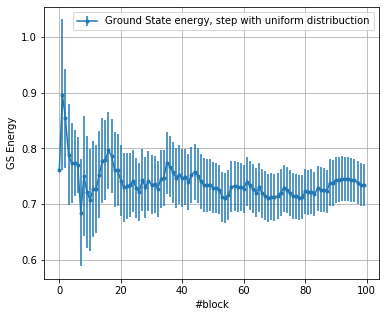

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

N=100
E, ErrorE = np.loadtxt("data01/data01.dat",  usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(6, 5))

plt.errorbar(x,E,marker=".", yerr=ErrorE, label="Ground State energy, step with uniform distribuction")

plt.xlabel('#block')
plt.ylabel('GS Energy')
#plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()

Scelgo che mi va bene l'errore finale, ottenuto con 100000 punti

### Esercizio 08.2

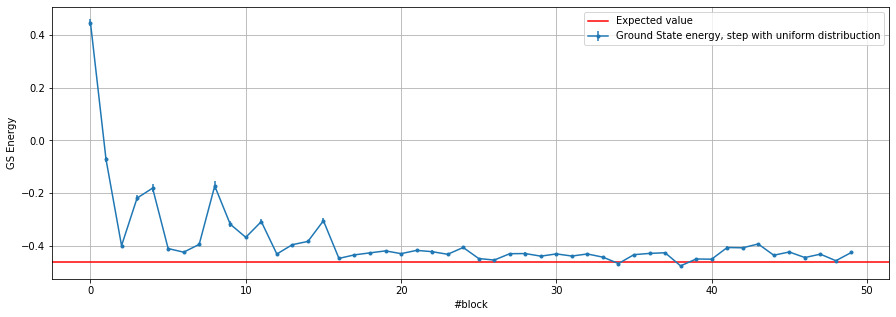

In [113]:
E, ErrorE = np.loadtxt("data02/data02.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(50) 
fig=plt.figure(figsize=(15, 5))

plt.errorbar(x,E, yerr=ErrorE,marker=".", label="Ground State energy, step with uniform distribuction")

plt.xlabel('#block')
plt.ylabel('GS Energy')
plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()

Stiamo sempre sopra perchè il GS è il minimo delle energie, quindi le mie misure stanno o lì o sopra, mai sotto. Se diminuisco i punti vado anche sotto perchè misuro male

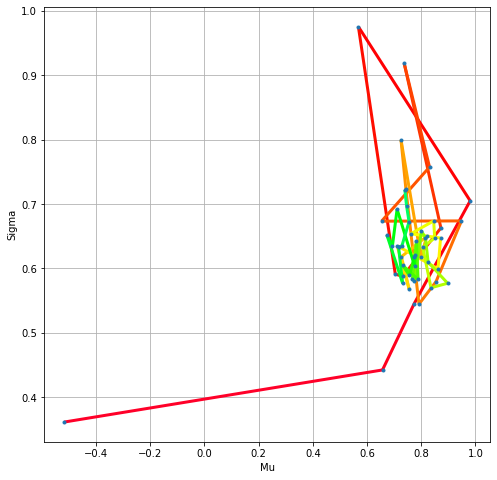

In [109]:
Mu, Sig = np.loadtxt("data02/data02_MuSig.dat", usecols=(0,1), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(8,8))

plt.plot(Mu, Sig,marker=".", linewidth=0)

plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
points = np.array([Mu, Sig]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
    norm=plt.Normalize(0, N))
lc.set_array(x)
lc.set_linewidth(3)
plt.gca().add_collection(lc)

plt.show()

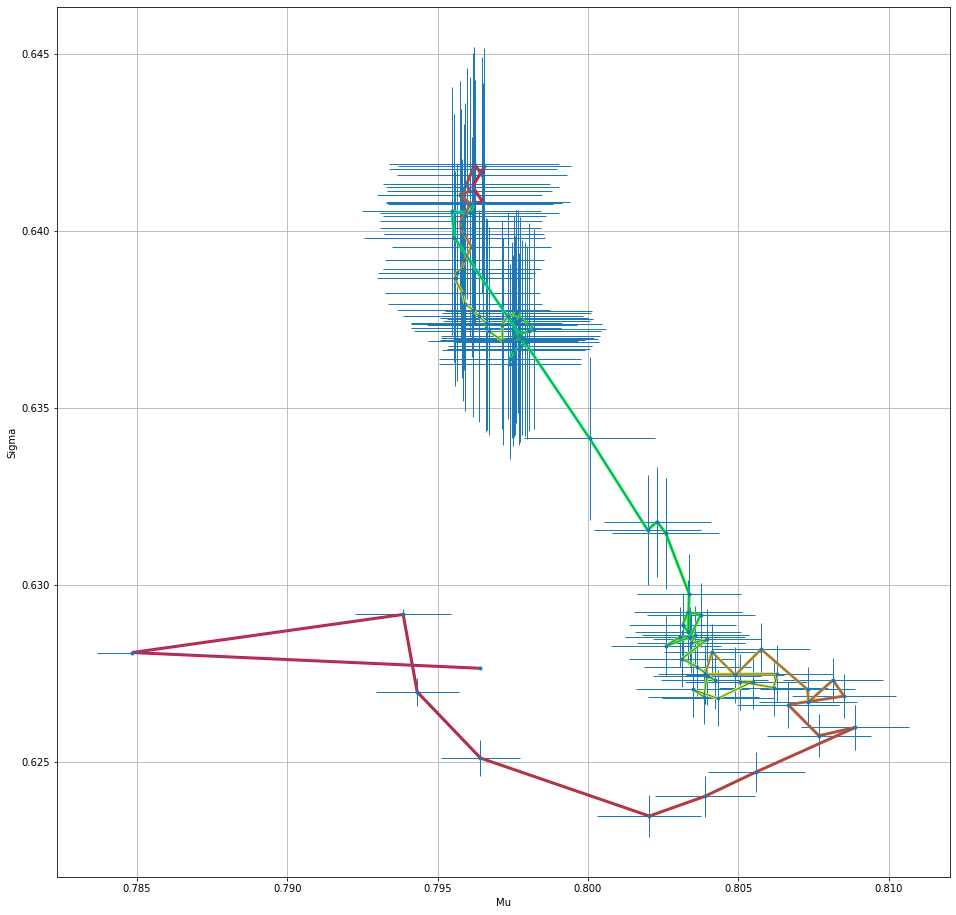

In [123]:
MuFinal, MuFinalErr, SigFinal, SigFinalErr = np.loadtxt("data02/data02_MuSigFinal.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(16,16))

plt.errorbar(MuFinal, SigFinal,yerr=SigFinalErr,xerr=MuFinalErr,marker=".", linewidth=1)

plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
points = np.array([MuFinal, SigFinal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
    norm=plt.Normalize(0, N))
lc.set_array(x)
lc.set_linewidth(3)
plt.gca().add_collection(lc)

plt.show()

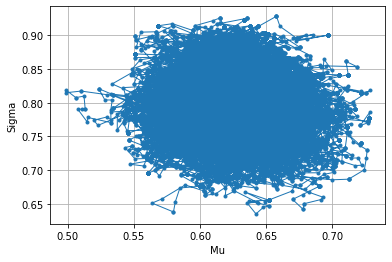

In [128]:
MuInsta, SigInsta = np.loadtxt("data02/data02_MuSigInstant.dat", usecols=(0,1), delimiter=' ', unpack='true')

x = np.arange(40000) 

plt.plot(SigInsta, MuInsta,marker=".", linewidth=1)

plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()


plt.show()